**GROUP 2**

Name - **Last Digit**
*  Alarcon Vargas, David Andres - **5**
*  Chaparro Pérez, David Felipe - **3**
*  Rincon Vija, Nicolas Mauricio - **7**


Modify [week_1_quadratic_Po_Shen_Loh.ipyn](https://colab.research.google.com/drive/15vXGB18_np6o0Rw8ZV4o08RTdCdDIdT0?usp=sharing) for

$$ ax^3+bx^+cx +d = 0$$

using Cubic equation – Cardano–Tartaglia formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)

Asuume $a=1$ then work wequations are of the form

$$ x^3+bx^+cx +d = 0$$

Including expalnataions. plots, solution code and test cases



In [50]:
def cubic(b,c,d,x):
    """Calulate the value of the  qubic equation, v = x**3 + bx**2 + c*x +d

    Parameters
    ----------
    b, c,d  : float
       Coefficients

    Returns
    -------
    v : float """

    # ... enter your code here ...

    v =  x**3 + b*x**2 + c*x + d

    return v

**Explanation**

This code is an implementation of Cardano's method for solving cubic equations, which can handle both real and complex roots. It follows a series of mathematical calculations to find the roots of the given cubic equation.

We use 'cmath' module, which provides support for complex numbers. Complex numbers are used because cubic equations can have complex roots.

ep is defined as one of the complex cube roots of unity. It's calculated as (-1 + sqrt(-3))/2, which is a common constant used in Cardano's method for cubic equations. d_0 and d_1 are intermediate variables used to simplify the calculations. They are based on coefficients b, c, and d.

Then, check if d_0 is equal to d_1. If they are equal, it means that all three roots of the cubic equation are the same. In this case, it calculates x as -b/3 and returns it three times as a tuple. This handles the case when all roots are real and equal.

Calculate C, a complex number used in Cardano's method. It involves finding the square root of a complex expression. If C ends up being zero, it switches to the other root by changing the sign in the formula.

The for loop calculates the three roots of the cubic equation using Cardano's method. It iterates over k from 0 to 2, where k determines which root is being calculated. The roots are then appended to the roots list.

Finally, the function returns the roots as a tuple.

In [51]:
import cmath

def solve_cubic(b, c, d):
    """Solve a cubic equation, x**3 + bx**2 + c*x +d = 0.

    Parameters
    ----------
    b, c,d : float
       Coefficients

    Returns
    -------
    x1, x2,x3 : float or complex
       Roots.  """

    # ... enter your code here ...

    d_0 = b**2 - 3*c
    d_1 = 2*b**3 - 9*b*c + 27*d

    if d_0 == d_1 == 0:
        x = -b / 3
        return x, x, x

    C = ((d_1 + cmath.sqrt(d_1**2 - 4*d_0**3)) / 2) ** (1/3)

    # C = 0, switch sign
    if C == 0:
        C = ((d_1 - cmath.sqrt(d_1**2 - 4*d_0**3)) / 2) ** (1/3)

    roots = []
    ep = (-1 + cmath.sqrt(-3)) / 2
    for k in range(3):
        root = - (1/(3)) * (b + ep**k * C + d_0 / (ep**k * C))
        roots.append(root)

    return tuple(roots)


Bulit test cases that include

$$x^3 =1,$$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1,$$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1, $$
three real diferent roots,  roots in the last digits of the group members, root of mtiuplicity two, and complex roots with small and large $b$.

**Last digits:**

In [52]:
from numpy import allclose

variants = [{'b': 0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0, 'd':-1.0},
            {'b': -1.0, 'c': 1.0, 'd':-1.0},
            {'b':  3.0, 'c': 0.0, 'd':-4.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))

True
True
True
True


In [53]:
solve_cubic(-24, 192, -512)

(8.0, 8.0, 8.0)

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cubic(b, c, d, num_points=400):
    """Plot a cubic equation, x**3 + bx**2 + c*x + d.

    Parameters
    ----------
    b, c, d : float
        Coefficients
    num_points : int, optional
        Number of points to plot (default is 400).
    """
    # Determine an appropriate x-range based on the coefficients
    max_coeff = max(abs(b), abs(c), abs(d))
    x_range = (-1.1 * max_coeff, 1.1 * max_coeff)

    # Generate x-values
    x_values = np.linspace(x_range[0], x_range[1], num_points)

    # Calculate y-values using the cubic equation
    y_values = x_values**3 + b * x_values**2 + c * x_values + d

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label=f'{b}x^2 + {c}x + {d}')

    # Add labels and a legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Cubic Equation Plot')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # Show the plot
    plt.show()


**TEST CASES**

Case:  b= 5 c= 3 d= 7
True


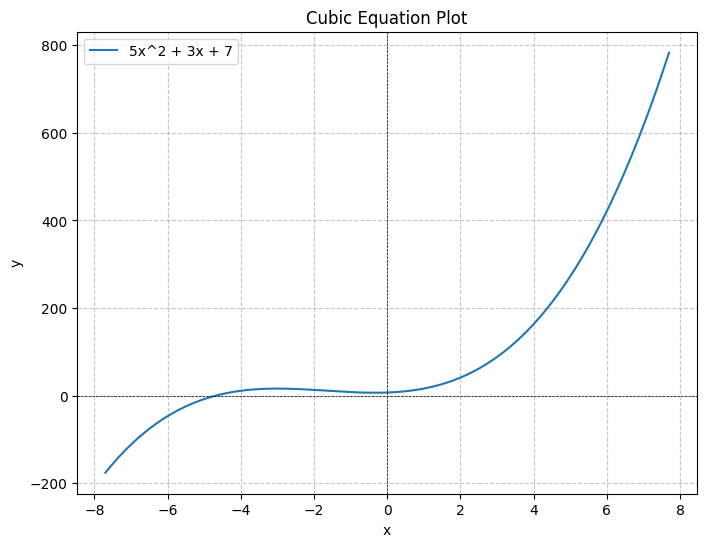

Case:  b= 0.0 c= 0.0 d= 1.0
True


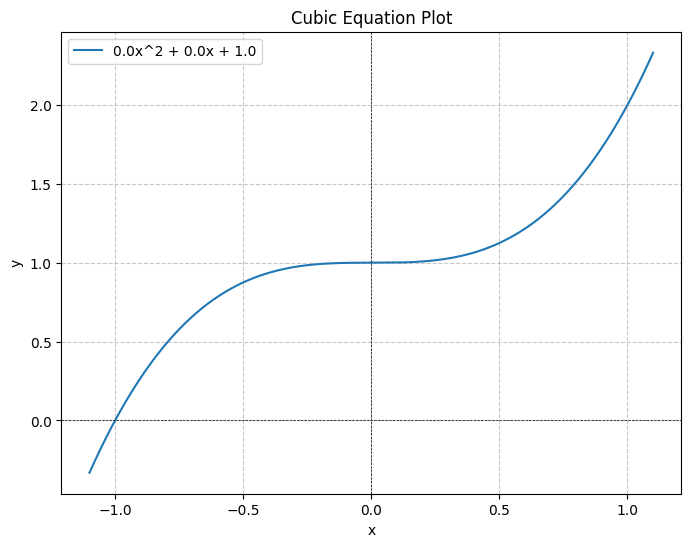

Case:  b= -3.0 c= 3.0 d= -1.0
True


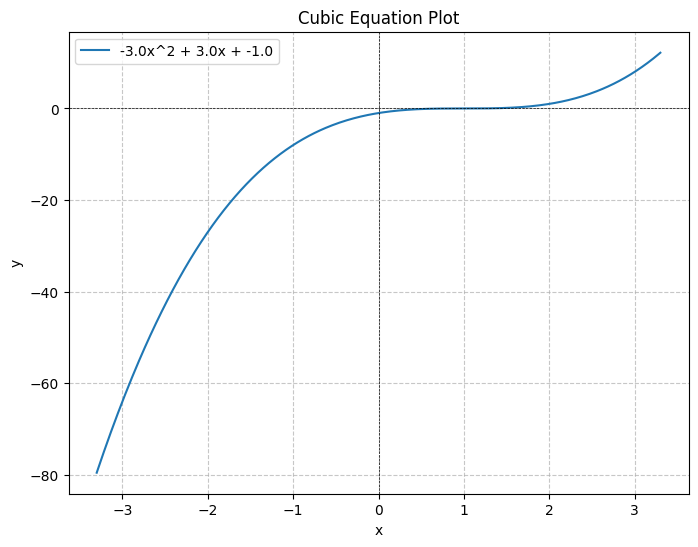

Case:  b= -1.0 c= 1.0 d= -1.0
True


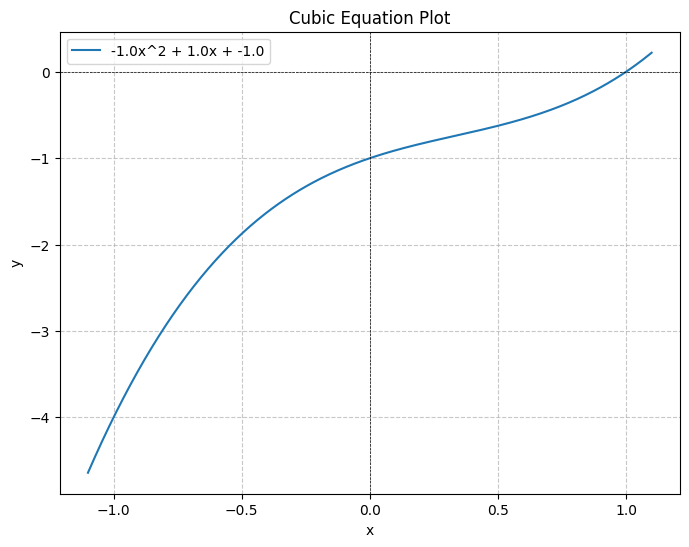

Case:  b= 3 c= 0 d= -4
True


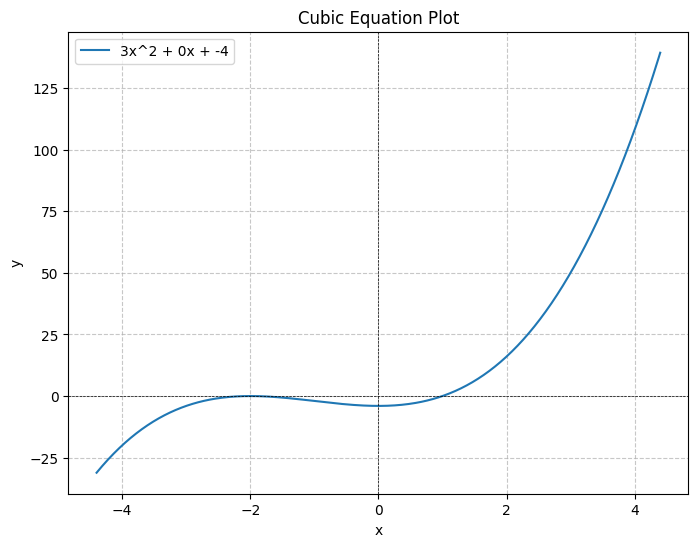

Case:  b= -0.00024783 c= 0 d= -0.007
True


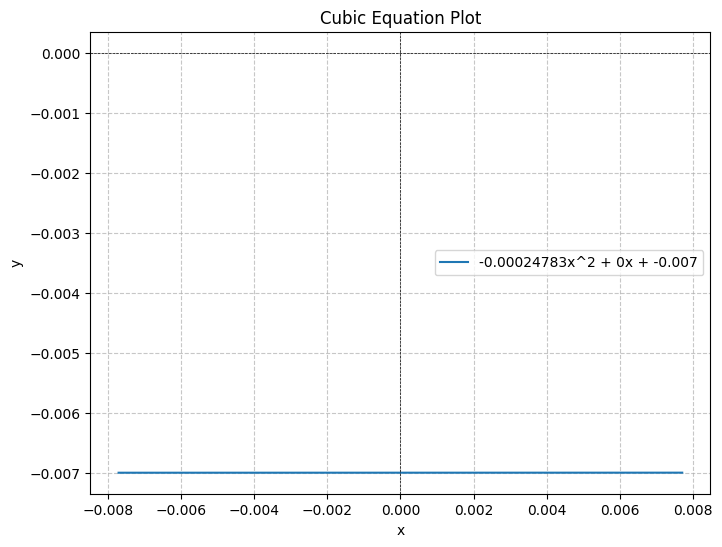

Case:  b= 1000000.0 c= 2.0 d= 1.0
False


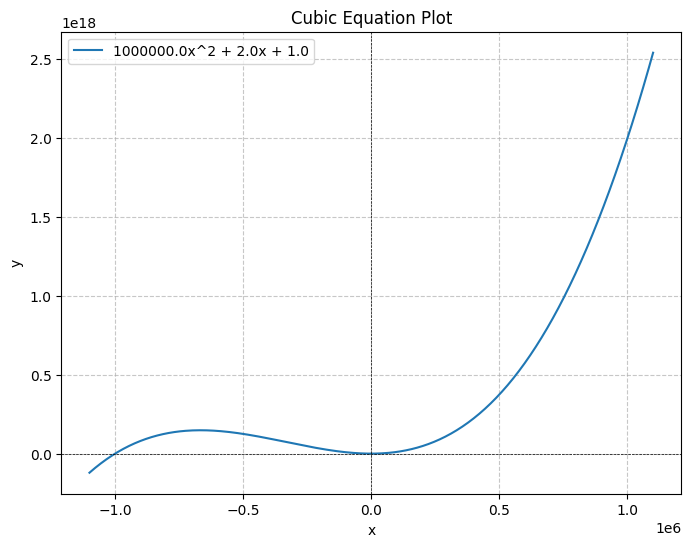

In [57]:
from numpy import allclose

tests = [
        {'b': 5, 'c': 3, 'd': 7},  # Roots in the last digits of the group members
        {'b': 0.0, 'c': 0.0, 'd': 1.0}, # Three different real roots
        {'b': -3.0, 'c': 3.0, 'd':-1.0}, # Single real root with triple multiplicity
        {'b': -1.0, 'c': 1.0, 'd':-1.0},  # One real root and two complex conjugate roots
        {'b': 3, 'c': 0, 'd': -4},  # Three different real roots
        {'b': -0.00024783, 'c': 0, 'd': -0.007},  # Small b, three different real roots
        {'b': 1000000.0, 'c': 2.0, 'd':1.0},  # Large b, three different real roots
        ]

for var in tests:
    x1, x2, x3= solve_cubic(**var)
    print('Case: ', 'b=',var['b'],'c=',var['c'],'d=',var['d'])
    print(allclose(cubic(var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(var['b'],var['c'],var['d'],x3), 0.0))
    plot_cubic(var['b'],var['c'],var['d'])

$$x^3 + bx^2 + cx + d$$
$$x^3 + bx^2 + cx + d = (x-s) (ex^2+fx+cx)$$

 Publisth the notebook in as **pperezp_groupN_CubicEquation.ipynb** at **MetNumUN2023II/Lab5** and submit only the code of **solve_cubic(b, c,d)** in UNcode Quiz Cubic Equation.